{'regions': [<pydrake.geometry.optimization.HPolyhedron object at 0x773eea5833f0>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee125cd30>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee0aa9db0>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee1472470>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee0b9fb70>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee13eac70>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee12c9370>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee14695f0>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee146a130>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee1469430>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee1254e70>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee1362a30>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee13620b0>, <pydrake.geometry.optimization.HPolyhedron object at 0x773ee13625b0>, <pydrak

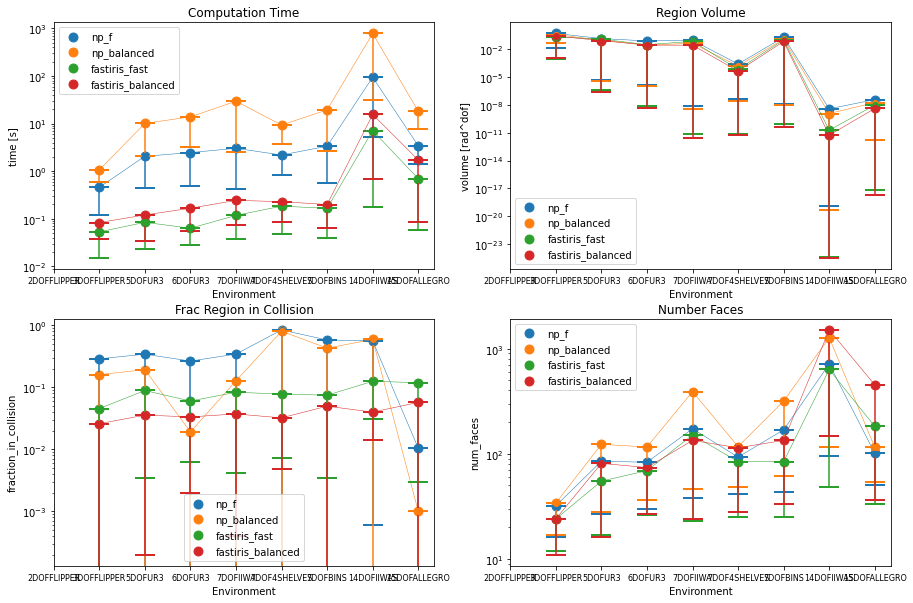

{'2DOFFLIPPER': {'default/config_vfast': {}, 'default/config_fast': {}, 'fast_iris/final_fast': {}, 'fast_iris/final_balanced': {}}, '3DOFFLIPPER': {'default/config_vfast': {'mean_stats': [0.1682763910293579, 2.617278244967258, 0.039628, 22.7], 'min_stats': [0.11786246299743652, 0.18727175502382365, 0.0, 16], 'max_stats': [0.45660829544067383, 7.596074850989972, 0.2868, 32]}, 'default/config_fast': {'mean_stats': [0.7441887378692627, 2.4166832751937535, 0.003562, 25.64], 'min_stats': [0.580681562423706, 0.6601251243378888, 0.0, 17], 'max_stats': [1.063014268875122, 5.685063216205587, 0.1592, 34]}, 'fast_iris/final_fast': {'mean_stats': [0.02656026601791382, 1.1719796443840846, 0.008860000000000002, 16.93], 'min_stats': [0.014940261840820312, 0.015309570988064153, 0.0, 12], 'max_stats': [0.052950382232666016, 3.264066248512567, 0.0452, 24]}, 'fast_iris/final_balanced': {'mean_stats': [0.052573776245117186, 1.253435958997511, 0.003538, 17.08], 'min_stats': [0.03733563423156738, 0.0188358

In [18]:
import matplotlib.pyplot as plt
import os
import pickle
from iris_environments.environments import env_names
import numpy as np

def get_env_name(path):
    for e in env_names:
        if e in path:
            return e    

keys_stats = ['times', 'volumes', 'fraction_in_collision', 'num_faces']
axis_labels = ['time [s]', 'volume [rad^dof]', 'fraction_in_collision', 'num_faces']
stat_titles = ['Computation Time', 'Region Volume', 'Frac Region in Collision', 'Number Faces']

default_configs_to_plot = [#'config_1', 
                           #'config_2',
                        #    'config_3',
                        'config_vfast', #use this
                        'config_fast',
                        #'config_medium',
                        #'config_precise',
                           ]
data = {}
for e in env_names:
    data[e] = {}
    for c in default_configs_to_plot:
        data[e][f"default/{c}"] = {}

root = '.'#os.path.dirname(os.path.abspath(__file__))
for conf in default_configs_to_plot:
    default_exp_path = [e for e in os.listdir(root + f"/benchmarks/default_experiments/{conf}") if e.endswith('pkl')]
    for exp in default_exp_path:
        env_name = get_env_name(exp)
        with open(root + f"/benchmarks/default_experiments/{conf}/"+exp, 'rb') as f:
            result = pickle.load(f)
            
            data[env_name][f"default/{conf}"]['mean_stats'] = [ np.mean(result[k]) for k in keys_stats]
            data[env_name][f"default/{conf}"]['min_stats'] = [ np.min(result[k]) for k in keys_stats]
            data[env_name][f"default/{conf}"]['max_stats'] = [ np.max(result[k]) for k in keys_stats]


experiments_to_add = [
    #'fast_iris/setting_1', 
    #'fast_iris/setting_2',
    #'fast_iris/config_1',
    #'sampled_iris/config_4',
    #'fast_iris/config_3',
    #'fast_iris/config_2',
    #'fast_iris/unadaptive_test_cfg_0',
    #'fast_iris/unadaptive_newtest_cfg_1'
    #'fast_iris/unadaptive_fast_cl', 
    #'fast_iris/unadaptive_fast_final_3', #use this
    #'fast_iris/unadaptive_fast_final_3_mixing',
    #'fast_iris/unadaptive_fast_final_3',
    #'fast_iris/unadaptive_fast_mixing_2',
    #'fast_iris/unadaptive_fast_mixing_3',
    'fast_iris/final_fast',
    'fast_iris/final_balanced',
    #'fast_iris/unadaptive_balanced_1',
    #'fast_iris/unadaptive_balanced_2',
    #'fast_iris/unadaptive_balanced_3',
    #'fast_iris/unadaptive_precise_1',
    #'fast_iris/unadaptive_precise_fix',
    #'fast_iris/unadaptive_precise_fix_2',
    #'fast_iris/unadaptive_precise_2',
    #'fast_iris/unadaptive_precise_3',
    #'fast_iris/unadaptive_precise_4',
    # 'fast_iris/unadaptive_fast_cl',
    # 'fast_iris/unadaptive_fast_2',
    # 'fast_iris/unadaptive_fast_3',
    ]
names = ['np_f','np_balanced','fastiris_fast', 'fastiris_balanced', 'final','f3','fm', 'fm2','b3','pf2', 'p4']
#"['2DOFFLIPPER_641ed63424.pkl', '3DOFFLIPPER_a33a92c6d1.pkl']

for exp_name in experiments_to_add:
    env_experiments = []
    for e in os.listdir(root+f"/logs/{exp_name}"):
        if e[-4:] == '.pkl':
            env_experiments.append(e)
    for e in env_names:
        data[e][exp_name] = {}
    for exp in env_experiments:
        env_name = get_env_name(exp)
        with open(root + f"/logs/{exp_name}/"+exp, 'rb') as f:
            result = pickle.load(f)
            data[env_name][exp_name]['mean_stats'] = [ np.mean(result[k]) for k in keys_stats]
            data[env_name][exp_name]['min_stats'] = [ np.min(result[k]) for k in keys_stats]
            data[env_name][exp_name]['max_stats'] = [ np.max(result[k]) for k in keys_stats]
            print(result)



with open('iris_environments/env_statistics.txt', 'r') as f:
    lines = f.readlines()
env_stats = {}
for l in lines[1:]:
    chunks = l.split(',')
    stats = [int(chunks[0]), float(chunks[1]), float(chunks[2])]
    env_stats[chunks[-1].strip('\n').strip(' ')] = stats

fig, axs = plt.subplots(nrows=2, ncols=2, figsize= (15,10))
axs_squeezed = [axs[0][0], axs[0][1], axs[1][0], axs[1][1]]
for statid, (k, ax) in enumerate(zip(keys_stats, axs_squeezed)):
    experiments = list(data[env_names[0]].keys())
    for i_exp, exp in enumerate(experiments):
        xloc = []
        min_stats = []
        max_stats = []
        mean_stats = []
        vols = []
        for xl, e in enumerate(env_names):
            if 'mean_stats' in data[e][exp].keys():
                xloc.append(xl)
                min_stats.append(data[e][exp]['min_stats'][statid])
                max_stats.append(data[e][exp]['max_stats'][statid])
                mean_stats.append(data[e][exp]['max_stats'][statid])
                vols.append(env_stats[e][2])
        vols = np.array(vols)
        ax.set_yscale('log')
        if 'volume' in axis_labels[statid]:
            mean_stats /= vols
            min_stats /= vols
            max_stats /= vols
        ax.scatter(xloc, mean_stats, label = names[i_exp], s= 80)    
        err = [np.array(mean_stats) - np.array(min_stats),
               np.array(max_stats)- np.array(mean_stats)]#
        artist = ax.errorbar(xloc, mean_stats, yerr = err, fmt='o', capsize=10, capthick=2)
        ax.plot(xloc, mean_stats, linewidth = 0.5, color= artist.lines[0].get_color())
        ax.set_xlabel('Environment')
        ax.set_ylabel(axis_labels[statid])
        ax.set_xticks(range(len(env_names)))
        ax.set_xticklabels(env_names, fontsize = 8)
        ax.legend()
        ax.set_title(stat_titles[statid])
        
plt.show()
print(data)

